In [103]:
# bostonのデータを使う
import pandas as pd
#現在の最大表示列数の出力
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 100)
use_column = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageArea", "OpenPorchSF", "PoolArea", "MiscVal"]
test = pd.read_csv("./boston/test.csv")
test = test[use_column]
test = test.fillna(0)
train = pd.read_csv("./boston/train.csv")
use_column.append("SalePrice")
train = train[use_column]

train = train.fillna(0)
print(train.isnull().any())
display(train.head())
train.describe()

LotFrontage     False
LotArea         False
OverallQual     False
OverallCond     False
YearBuilt       False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
Fireplaces      False
GarageArea      False
OpenPorchSF     False
PoolArea        False
MiscVal         False
SalePrice       False
dtype: bool


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,2003,3,1,8,0,548,61,0,0,208500
1,80.0,9600,6,8,1976,3,1,6,1,460,0,0,0,181500
2,68.0,11250,7,5,2001,3,1,6,1,608,42,0,0,223500
3,60.0,9550,7,5,1915,3,1,7,1,642,35,0,0,140000
4,84.0,14260,8,5,2000,4,1,9,1,836,84,0,0,250000


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,2.866438,1.046575,6.517808,0.613014,472.980137,46.660274,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,0.815778,0.220338,1.625393,0.644666,213.804841,66.256028,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,2.000000,1.000000,5.000000,0.000000,334.500000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,3.000000,1.000000,6.000000,1.000000,480.000000,25.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,3.000000,1.000000,7.000000,1.000000,576.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,8.000000,3.000000,14.000000,3.000000,1418.000000,547.000000,738.000000,15500.000000,755000.000000


In [46]:
submittion = pd.read_csv("./boston/sample_submission.csv")
display(submittion.head())
submittion.describe()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


# 前処理
* brew install libompがないとエラーが発生

In [104]:
from pycaret.regression import *
exp1 = setup(train, target = 'SalePrice')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2736
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 14)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [101]:
import pandas_profiling
test.profile_report()

# モデルの精度比較
#### MAE 平均誤差
#### MSE 平均二乗誤差
#### RMSE 二乗平均平方根誤差

In [105]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,22349.160800,1275891367.892500,35379.504200,0.796600,0.168000,0.124700
1,Extreme Gradient Boosting,23483.449300,1364869394.816100,36603.027200,0.780700,0.180400,0.134800
2,Gradient Boosting Regressor,24208.271800,1532151064.914700,38731.306000,0.753400,0.184400,0.138100
3,Random Forest,23958.101000,1612385221.909700,39572.791000,0.748000,0.185900,0.135900
4,Light Gradient Boosting Machine,25243.878800,1647935712.246700,40059.615200,0.743800,0.188400,0.139900
5,Lasso Least Angle Regression,23708.661100,1563699784.841800,39055.429300,0.741400,0.181400,0.134400
6,Lasso Regression,23836.554100,1592453457.963900,39351.363200,0.736500,0.183700,0.135400
7,Ridge Regression,23833.296200,1620644785.695000,39743.052400,0.735600,0.183400,0.135800
8,Bayesian Ridge,23819.759200,1632323414.073700,39823.539300,0.731800,0.183500,0.135800
9,Linear Regression,23923.660500,1655687100.303400,40056.873500,0.727100,0.185300,0.136400


# モデル生成

In [106]:
model = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24748.9288,1.991608e+09,44627.4321,0.7701,0.1862,0.1409
1,25584.8477,1.518442e+09,38967.1914,0.8111,0.1813,0.1347
2,21823.5889,9.364169e+08,30600.9300,0.8465,0.1492,0.1185
3,26046.0744,1.378660e+09,37130.3072,0.7782,0.1900,0.1400
4,23693.7552,2.845106e+09,53339.5351,0.5235,0.2020,0.1477
5,25474.5983,2.182659e+09,46718.9399,0.4933,0.2220,0.1648
6,23708.1657,1.828292e+09,42758.5342,0.7450,0.1996,0.1404
7,20491.1879,1.000679e+09,31633.5144,0.8204,0.1527,0.1084
8,23837.2562,1.114355e+09,33381.9627,0.7345,0.1817,0.1365
9,22789.1886,1.527016e+09,39077.0461,0.7957,0.1704,0.1267


# モデルパラメーター

In [53]:
model

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

# モデルの精度の可視化

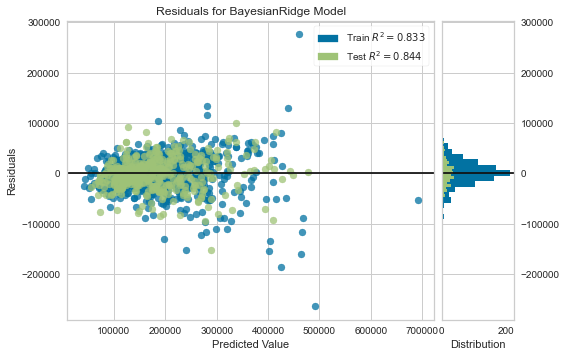

In [107]:
plot_model(model)

In [108]:
rf_holdout_pred = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,23020.1163,9.473474e+08,30779.0086,0.8439,0.1863,0.1406


In [109]:
predictions = predict_model(model, data=test)

In [110]:
display(predictions)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,PoolArea,MiscVal,Label
0,80.0,11622,5,6,1961,2,1,5,0,730.0,0,0,0,150664.8070
1,81.0,14267,6,6,1958,3,1,6,0,312.0,36,0,12500,128017.3661
2,74.0,13830,5,5,1997,3,1,6,1,482.0,34,0,0,160572.1936
3,78.0,9978,6,6,1998,3,1,7,1,470.0,36,0,0,189397.7909
4,43.0,5005,8,5,1992,2,1,5,0,506.0,82,0,0,220596.5652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,3,1,5,0,0.0,0,0,0,101881.4995
1455,21.0,1894,4,5,1970,3,1,6,0,286.0,24,0,0,104245.5394
1456,160.0,20000,5,7,1960,4,1,7,1,576.0,0,0,0,195547.8231
1457,62.0,10441,5,5,1992,3,1,6,0,0.0,32,0,700,114640.8623


In [111]:
pd_output = predictions[["Label"]]

In [112]:
pd_output = pd_output.reset_index().rename(columns={"index": "Id", "Label": "SalePrice"})
plus_1 = lambda x: x + 1461
pd_output["Id"] = pd_output["Id"].map(plus_1)

In [113]:
pd_output.to_csv("./boston/20200522_submit.csv", columns=['Id', 'SalePrice'], index=False)

In [114]:
pd_output

,Id,SalePrice
0,1461,150664.8070
1,1462,128017.3661
2,1463,160572.1936
3,1464,189397.7909
4,1465,220596.5652
...,...,...
1454,2915,101881.4995
1455,2916,104245.5394
1456,2917,195547.8231
1457,2918,114640.8623
